# 예측한 인슐린 분류에 사용하기

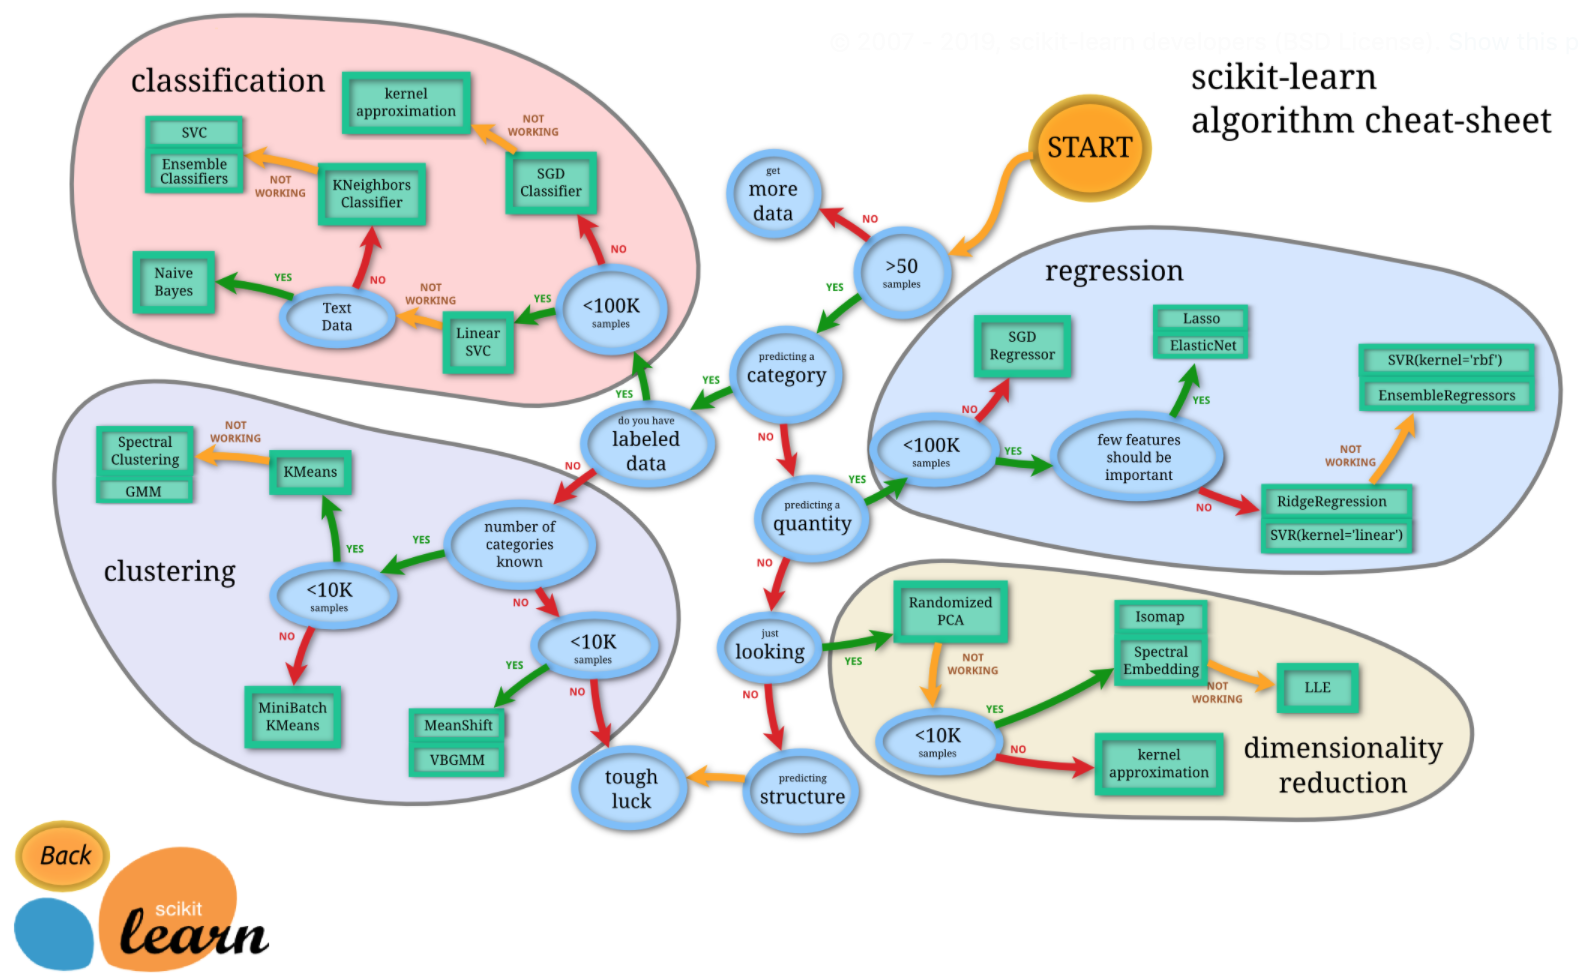

Classification(분류)와 Regression(회귀)은 지도학습, Clustering(군집화)와 Dimensionality Reduction(차원 축소)는 비지도학습으로 분류된다


Classification은 카테고리 데이터로 답을 정할 때 사용하고, Regression은 수치를 예측하는 데 사용한다.


비지도학습은 정답이 없는 데이터를 학습시키고 예측할 때 사용합니다.

또한 `데이터 전처리`에서도 많이 사용하는 편입니다.

`feature가 너무 많아서 예측에 도움이 안될 때, 시각화할 때 차원 축소를 할 수 있습니다.`

## 라이브러리 로드

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [61]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [62]:
df_insulin = pd.read_csv('data/diabetes_fill_insulin.csv')
df['Insulin'] = df_insulin['Insulin']
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_mid,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,175.645994,33.6,0.468492,50,1,False,False,True,False,169.5,5.138735,False
1,1,-1.123396,66,29,63.189561,26.6,-0.365061,31,0,False,False,True,False,102.5,4.639572,True
2,8,1.943724,64,0,189.450000,23.3,0.604397,32,1,True,False,True,False,169.5,5.138735,False
3,1,-0.998208,66,23,94.000000,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168.000000,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [63]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_mid', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [66]:
X = df[[
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'Pregnancies_high',
    'DiabetesPedigreeFunction',
    'Age',
]]
X.shape

(768, 8)

In [67]:
y = df['Outcome']
y.shape

(768,)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

## 여러 개의 알고리즘을 사용해서 비교하기

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]
[(i.__class__.__name__, i.get_params()) for i in estimators]

[('DecisionTreeClassifier',
  {'ccp_alpha': 0.0,
   'class_weight': None,
   'criterion': 'gini',
   'max_depth': None,
   'max_features': None,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.0,
   'min_impurity_split': None,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'min_weight_fraction_leaf': 0.0,
   'presort': 'deprecated',
   'random_state': 42,
   'splitter': 'best'}),
 ('RandomForestClassifier',
  {'bootstrap': True,
   'ccp_alpha': 0.0,
   'class_weight': None,
   'criterion': 'gini',
   'max_depth': None,
   'max_features': 'auto',
   'max_leaf_nodes': None,
   'max_samples': None,
   'min_impurity_decrease': 0.0,
   'min_impurity_split': None,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'min_weight_fraction_leaf': 0.0,
   'n_estimators': 100,
   'n_jobs': None,
   'oob_score': False,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False}),
 ('GradientBoostingClassifier',
  {'ccp_alpha': 0.0,
   'criterion': 'friedman_mse',
   'init'

In [70]:
max_depth = np.random.randint(5, 20, 10)
max_depth

array([12, 15, 14, 12, 11,  6, 14, 10, 18,  7])

In [71]:
import random

max_depth = random.sample(range(5, 20), 10)
max_depth

[12, 17, 13, 14, 7, 5, 19, 10, 8, 16]

In [72]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.80807369, 0.90023623, 0.86448979, 0.39298172, 0.8592947 ,
       0.89182588, 0.72483744, 0.66516818, 0.50568189, 0.73080774])

In [73]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)

results

[['DecisionTreeClassifier'],
 ['RandomForestClassifier'],
 ['GradientBoostingClassifier']]

In [74]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'max_depth': max_depth, 'max_features': max_features}

results = []
for estimator in estimators:
    result = []
    print(estimator.__class__.__name__)
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions['n_estimators'] = random.sample(
            range(100, 200), 10)

    clf = RandomizedSearchCV(
        estimator,
        param_distributions=param_distributions,
        n_iter=10,
        verbose=1,  # 로그 출력
        n_jobs=-1,
        scoring='accuracy',
        cv=5)  # 하이퍼 파라미터 당 다섯 번 학습
    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)

DecisionTreeClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomForestClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.9s finished


GradientBoostingClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   19.9s finished


In [75]:
df = pd.DataFrame(results,
                  columns=[
                      'model', 'best_params', 'train_score', 'test_score',
                      'cv_results'
                  ])
df

,model,best_params,train_score,test_score,cv_results
0,DecisionTreeClassifier,"{'max_features': 0.8592947022748705, 'max_dept...",0.768719,0.733766,"{'mean_fit_time': [0.008794212341308593, 0.007..."
1,RandomForestClassifier,"{'n_estimators': 191, 'max_features': 0.724837...",0.799720,0.740260,"{'mean_fit_time': [0.5772684574127197, 0.66202..."
2,GradientBoostingClassifier,"{'n_estimators': 123, 'max_features': 0.724837...",0.794869,0.759740,"{'mean_fit_time': [2.8158126354217528, 1.55911..."


In [76]:
df.loc[1]

model                                     RandomForestClassifier
best_params    {'n_estimators': 191, 'max_features': 0.724837...
train_score                                              0.79972
test_score                                               0.74026
cv_results     {'mean_fit_time': [0.5772684574127197, 0.66202...
Name: 1, dtype: object

In [78]:
pd.DataFrame(df.loc[1, 'cv_results'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.577268,0.044348,0.029184,0.003427,165,0.665168,5,"{'n_estimators': 165, 'max_features': 0.665168...",0.821138,0.837398,0.772358,0.715447,0.827869,0.794842,0.045612,2
1,0.662021,0.019622,0.032782,0.002039,191,0.900236,7,"{'n_estimators': 191, 'max_features': 0.900236...",0.804878,0.837398,0.756098,0.747967,0.819672,0.793203,0.035251,3
2,0.658223,0.059119,0.033981,0.001672,191,0.724837,7,"{'n_estimators': 191, 'max_features': 0.724837...",0.821138,0.845528,0.764228,0.739837,0.827869,0.799720,0.040485,1
3,0.613648,0.044089,0.029383,0.002058,165,0.900236,16,"{'n_estimators': 165, 'max_features': 0.900236...",0.796748,0.804878,0.739837,0.756098,0.827869,0.785086,0.032391,9
4,0.603655,0.018857,0.030183,0.000979,174,0.859295,12,"{'n_estimators': 174, 'max_features': 0.859294...",0.796748,0.804878,0.739837,0.772358,0.819672,0.786699,0.028001,6
5,0.361393,0.023723,0.020988,0.002096,113,0.505682,8,"{'n_estimators': 113, 'max_features': 0.505681...",0.821138,0.821138,0.747967,0.731707,0.811475,0.786685,0.038756,8
6,0.612449,0.026543,0.041377,0.010437,174,0.891826,8,"{'n_estimators': 174, 'max_features': 0.891825...",0.813008,0.821138,0.756098,0.739837,0.827869,0.791590,0.036293,4
7,0.770559,0.008597,0.036579,0.003824,199,0.808074,13,"{'n_estimators': 199, 'max_features': 0.808073...",0.772358,0.813008,0.747967,0.747967,0.827869,0.781834,0.033090,10
8,0.773557,0.097194,0.048373,0.019396,165,0.859295,12,"{'n_estimators': 165, 'max_features': 0.859294...",0.804878,0.821138,0.723577,0.764228,0.819672,0.786699,0.037665,6
9,0.887292,0.134642,0.065963,0.030688,165,0.900236,13,"{'n_estimators': 165, 'max_features': 0.900236...",0.788618,0.821138,0.739837,0.756098,0.827869,0.786712,0.034691,5


인슐린 결측치를 중앙값으로 대체한 경우가 예측력이 더 높다.